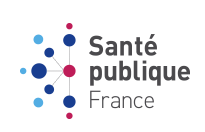

<h1><center> NOTEBOOK D'EXPLORATION

# Sommaire <a id="0"></a>



I.  [Importation des librairies et données](#1)<br>
II.  [Distribution des nutriscores par pays](#2)<br>
III.  [Distribution par catégorie des produits vendus en France](#3) <br>
IV. [Analyse des compositions nutritionnelles](#4)<br>
V. [Comparaison des teneurs en sel par scores](#5)<br>
VI. [Comparaison des teneurs en graisse des par score](#6) <br>
VII. [Comparaison des teneurs en fibres des par score](#7) <br>
VIII. [ACP sur les produits laitiers](#7) <br>


## I. Importation des librairies <a id="1"></a>

In [1]:
#import librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#import file
food_facts=pd.read_csv('food_facts.csv', low_memory=False)

In [3]:
food_facts.head()

code                                                url  \
0  3380390204408  http://world-fr.openfoodfacts.org/produit/3380...   
1  3270160103713  http://world-fr.openfoodfacts.org/produit/3270...   
2  8480000610232  http://world-fr.openfoodfacts.org/produit/8480...   
3  3256223662106  http://world-fr.openfoodfacts.org/produit/3256...   
4  5411788045094  http://world-fr.openfoodfacts.org/produit/5411...   

           product_name     brands brands_tags      origins origins_tags  \
0          Pois chiches    Primeal     primeal      unknown      unknown   
1          Fèves pelées     Picard      picard  Pérou,Chili  perou,chili   
2               Edamame  Sin marca   sin-marca      unknown      unknown   
3  Lentilles corail bio    U Bio,U     u-bio,u      unknown      unknown   
4  Edamamé Beans Nature       Lima        lima        Pérou        perou   

  countries_fr                          ingredients_text            allergens  \
0       France                              Pois chiches              unknown   
1       France                                Fève pelée              unknown   
2      Espagne  Vainas de _soja_ verde. _Contiene soja_.  soja, Contiene soja   
3       France                                   unknown              unknown   
4       France                       Edamamé (soja), Eau              unknown   

   ... calcium_100g phosphorus_100g iron_100g magnesium_100g zinc_100g  \
0  ...          0.0             0.0       0.0            0.0       0.0   
1  ...          0.0             0.0       0.0            0.0       0.0   
2  ...          0.0             0.0       0.0            0.0       0.0   
3  ...          0.0             0.5       0.0            0.0       0.0   
4  ...          0.0             0.0       0.0            0.0       0.0   

  copper_100g manganese_100g  selenium_100g  fruits_vegetables_nuts_100g  \
0         0.0            0.0            0.0                          0.0   
1         0.0            0.0            0.0                          0.0   
2         0.0            0.0            0.0                          0.0   
3         0.0            0.0            0.0                          0.0   
4         0.0            0.0            0.0                          0.0   

   cocoa_100g  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 57 columns]

## II Distribution des nutriscores par pays <a id="2"></a>

In [4]:
food_facts_fr=food_facts[food_facts['countries_fr'].copy().str.contains('[fF]rance', regex=True)]

In [5]:
food_facts_us=food_facts[food_facts['countries_fr'].copy().str.contains('[eEÉ]tats-Unis', regex=True)]

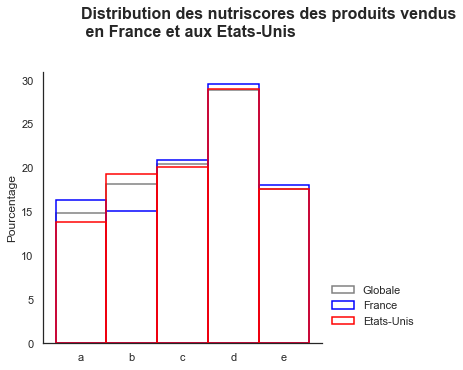

In [6]:
sns.set_theme(style="white")
fig1, ax =plt.subplots(figsize=(5,5))
for location in ['top','right']:
        ax.spines[location].set_visible(False)
sns.histplot(data=food_facts, x='nutrition_grade_fr', stat='percent', color='grey', fill=False, ax=ax)
sns.histplot(data=food_facts_fr, x='nutrition_grade_fr', stat='percent', color='blue', ax=ax, fill=False)
sns.histplot(data=food_facts_us, x='nutrition_grade_fr', stat='percent', color='red', ax=ax, fill=False)
ax.legend(labels=['Globale','France','Etats-Unis'],bbox_to_anchor=(1, 0.25), ncol=1, frameon=0)
ax.set_ylabel('Pourcentage')
ax.set_xlabel('')
ax.text(s='Distribution des nutriscores des produits vendus\n en France et aux Etats-Unis',x=0, y=35, weight='bold', fontsize='16')
#plt.show()

plt.savefig('fig1.png', dpi='figure', metadata=None,
        bbox_inches='tight', pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None )

testons l'hypothèse que la distribution des nutriscore des produits vendus en france est la meme que celle de la base globale et aux Etats Unis

In [7]:
freq=food_facts.groupby('nutrition_grade_fr').count()['code'].to_frame().reset_index()

In [8]:
freq['frequencies']=freq['code']/freq['code'].sum()

In [9]:
freqs_fr=food_facts_fr.groupby('nutrition_grade_fr').count()['code'].to_frame().reset_index()

In [10]:
freqs_fr

nutrition_grade_fr   code
0                  a  10956
1                  b  10071
2                  c  13977
3                  d  19737
4                  e  12106

In [11]:
freqs_us=food_facts_us.groupby('nutrition_grade_fr').count()['code'].to_frame().reset_index()

In [12]:
freqs_fr['frequencies']=freqs_fr['code']/freqs_fr['code'].sum()

In [13]:
freqs_us['frequencies']=freqs_us['code']/freqs_us['code'].sum()

In [14]:
freqs_us

nutrition_grade_fr   code  frequencies
0                  a  23833     0.138878
1                  b  33204     0.193484
2                  c  34584     0.201526
3                  d  49793     0.290150
4                  e  30197     0.175962

In [15]:
from scipy.stats import chisquare

In [16]:
chisquare(f_obs=freqs_fr['frequencies']*100, f_exp=freq['frequencies']*100)

Power_divergenceResult(statistic=0.739771655596264, pvalue=0.9463352093206515)

In [17]:
chisquare(f_obs=freqs_fr['frequencies']*100, f_exp=freqs_us['frequencies']*100)

Power_divergenceResult(statistic=1.4510278453695802, pvalue=0.8352794074707042)

La pvalue étant plus de 83% nous ne pouvons pas rejeter l'hypothèse que la distribution des nutriscore en France est la même que dans le monde.

## III Analyse des nutriscore des produits produits vendus en France par cartégorie <a id="3"></a>

In [18]:
list(food_facts_fr['pnns_groups_1'].unique())

['fruits and vegetables',
 'composite foods',
 'cereals and potatoes',
 'unknown',
 'salty snacks',
 'fat and sauces',
 'beverages',
 'sugary snacks',
 'fish meat eggs',
 'milk and dairy products']

In [19]:
nutri_palette={'a':'#038141','b':'#85BB2F', 'c':'#FECB02', 'd':'#EE8100','e':'#E63E11' }

In [20]:
nutrilist=['#038141','#85BB2F','#FECB02','#EE8100','#E63E11']

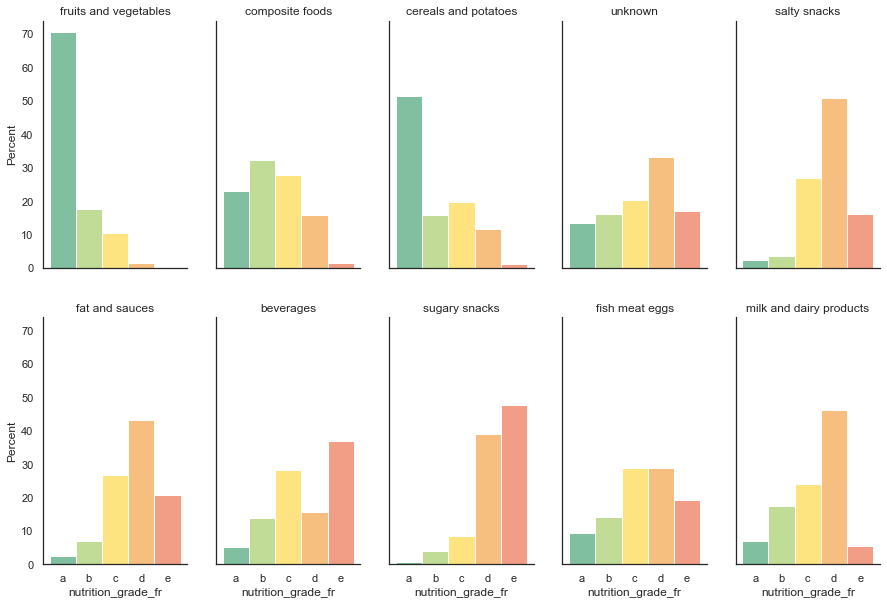

In [21]:
pnns_groups= list(food_facts_fr['pnns_groups_1'].unique())
fig1, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) =plt.subplots(2,5,figsize=(15,10), sharey=True, sharex=True)

for ax,group in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10), pnns_groups):
   
    sns.histplot(data=food_facts_fr.loc[food_facts_fr['pnns_groups_1']==group], x='nutrition_grade_fr',ax=ax, stat='percent',
                 fill=True, hue='nutrition_grade_fr', palette=nutri_palette, legend=False)
    ax.set_title(group)
    for location in ['top','right']:
        ax.spines[location].set_visible(False)

plt.savefig('fig2.png', dpi='figure', metadata=None,
        bbox_inches='tight', pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None )

## IV. Analyse de la composition nutritionnelle <a id="4"></a>

Analysons les distributions cumulées des variables 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 
                 'fiber_100g','proteins_100g','salt_100g'

In [22]:
#liste des colonnes principales
main_nutri_cols=['fat_100g', 'carbohydrates_100g', 'sugars_100g', 
                 'fiber_100g','proteins_100g','salt_100g'
                ]

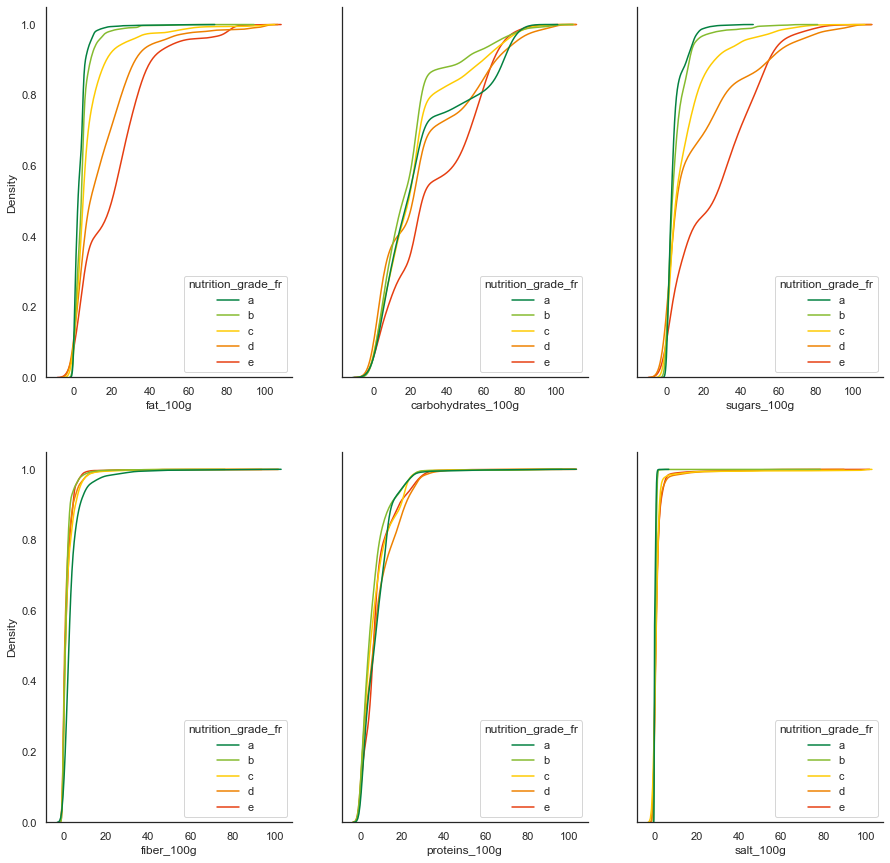

In [23]:
fig1, ((ax1,ax2,ax3),(ax4,ax5,ax6)) =plt.subplots(2,3,figsize=(15,15), sharey=True)

for ax,col in zip((ax1,ax2,ax3,ax4,ax5,ax6), main_nutri_cols):
    sns.kdeplot(data=food_facts_fr, x=col, hue='nutrition_grade_fr',cumulative=True, common_norm=False, 
                common_grid=False, ax=ax, palette=nutri_palette)
    for location in ['top','right']:
        ax.spines[location].set_visible(False)
        
plt.savefig('fig3.png', dpi='figure', metadata=None,
        bbox_inches='tight', pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None )

Analyse bivariée des principales colonnes pour les produits vendus en France

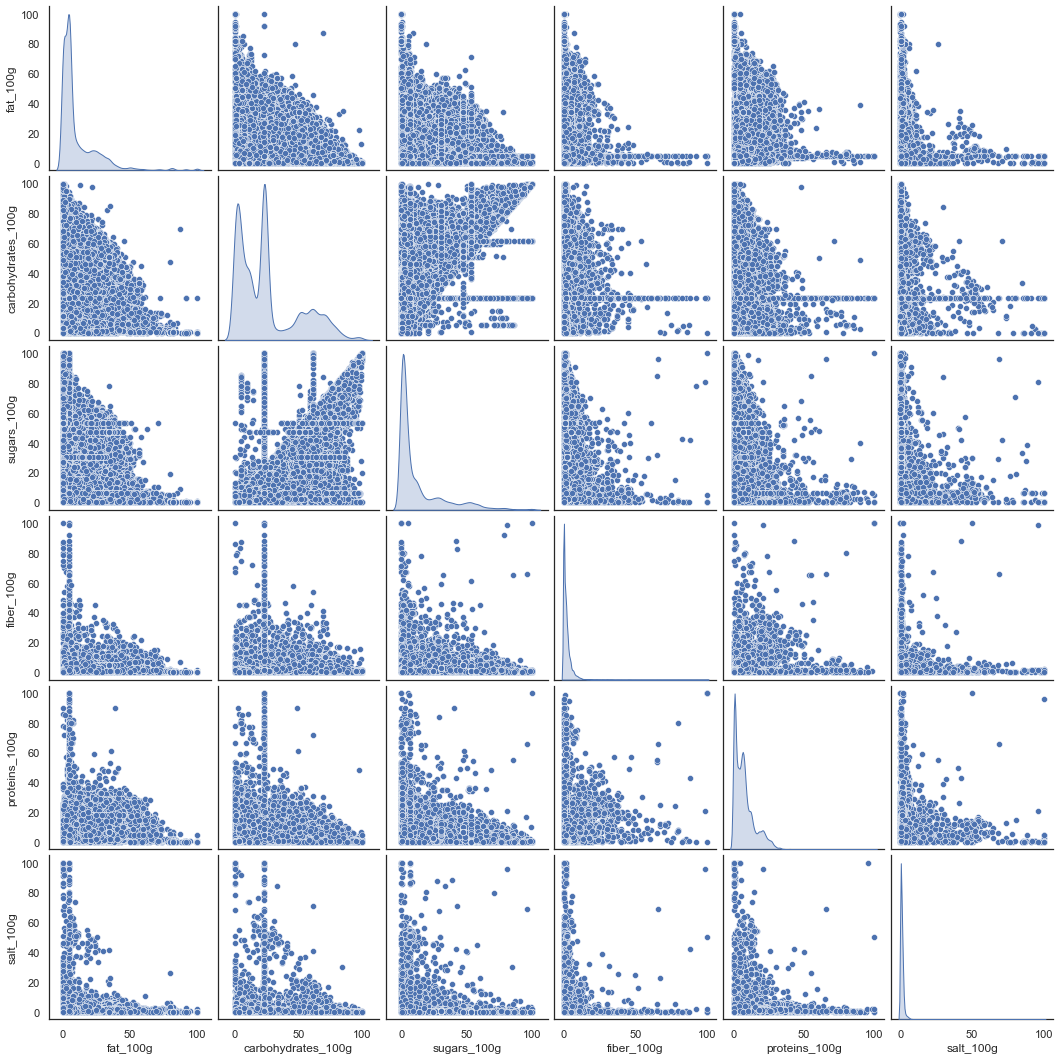

In [24]:
sns.pairplot(data=food_facts_fr[main_nutri_cols], kind="scatter", diag_kind='kde')
plt.show()

Analysons les distributions des principales colonnes par score et faisons une analyse bivariée entre elles

In [25]:
nutri_a=food_facts_fr.loc[food_facts_fr['nutrition_grade_fr']=='a']
nutri_b=food_facts_fr.loc[food_facts_fr['nutrition_grade_fr']=='b']
nutri_c=food_facts_fr.loc[food_facts_fr['nutrition_grade_fr']=='c']
nutri_d=food_facts_fr.loc[food_facts_fr['nutrition_grade_fr']=='d']
nutri_e=food_facts_fr.loc[food_facts_fr['nutrition_grade_fr']=='e']

In [26]:
def concatcorr(col):
    df_corr=pd.concat([
                       nutri_a[main_nutri_cols].corr()[col],
                       nutri_b[main_nutri_cols].corr()[col],
                       nutri_c[main_nutri_cols].corr()[col],
                       nutri_d[main_nutri_cols].corr()[col],
                       nutri_e[main_nutri_cols].corr()[col]],
                      axis=1)
    df_corr.columns=['a','b','c','d','e']
    return df_corr.T

In [27]:
df_corrs=[concatcorr(col) for col in main_nutri_cols]

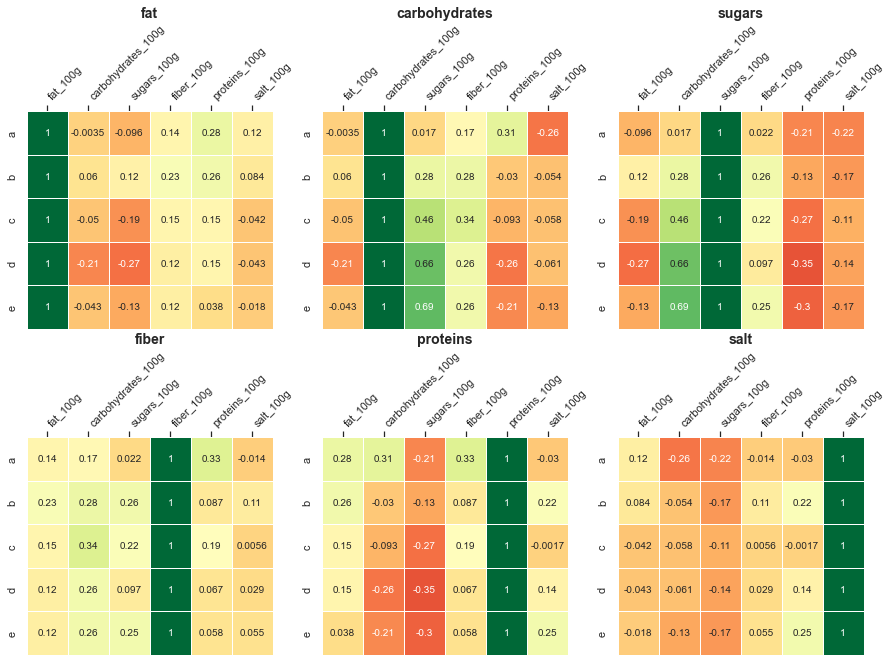

In [28]:
# analyse des corrélations
fig1, ((ax1,ax2,ax3),(ax4,ax5,ax6)) =plt.subplots(2,3,figsize=(15,10), gridspec_kw=dict(hspace=0.5))
for ax,df,col in zip((ax1,ax2,ax3,ax4,ax5,ax6), df_corrs, main_nutri_cols):
    sns.heatmap(df, annot=True, linewidths=.5, center=0.2, ax=ax,
                cmap='RdYlGn', annot_kws={'fontsize':10}, cbar=False)
    ax.xaxis.tick_top()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left")
    ax.set_title(col[:-5], weight='bold', size='14')
         
plt.show()

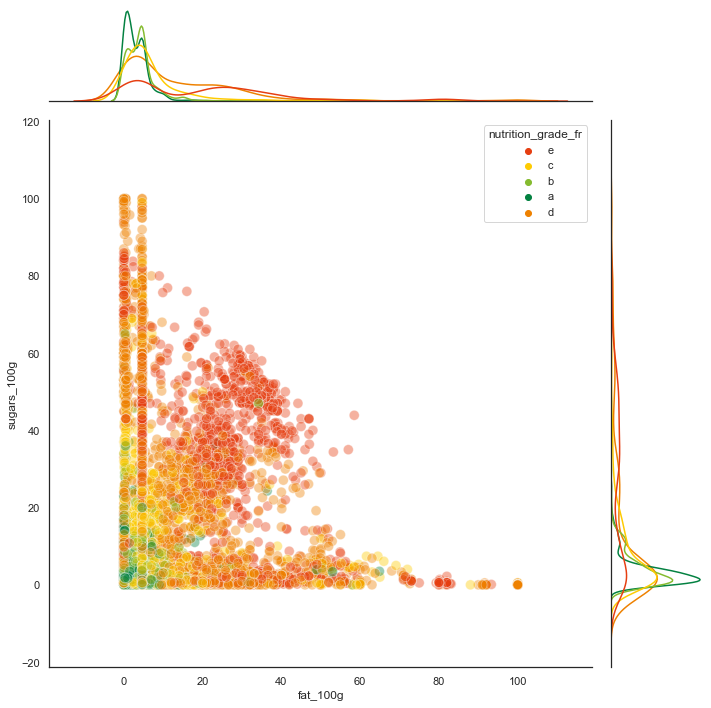

In [29]:
#analyse graisse versus sucres
g=sns.JointGrid(data=food_facts_fr[['nutrition_grade_fr','sugars_100g','fat_100g']].sample(10000),
              x='fat_100g', y='sugars_100g',
              hue='nutrition_grade_fr',  height=10, palette=nutri_palette)
g.plot_joint(sns.scatterplot, s=100, alpha=0.4)
g.plot_marginals(sns.kdeplot)


#plt.show()

plt.savefig('fig5.png', dpi='figure', metadata=None,
        bbox_inches='tight', pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None )

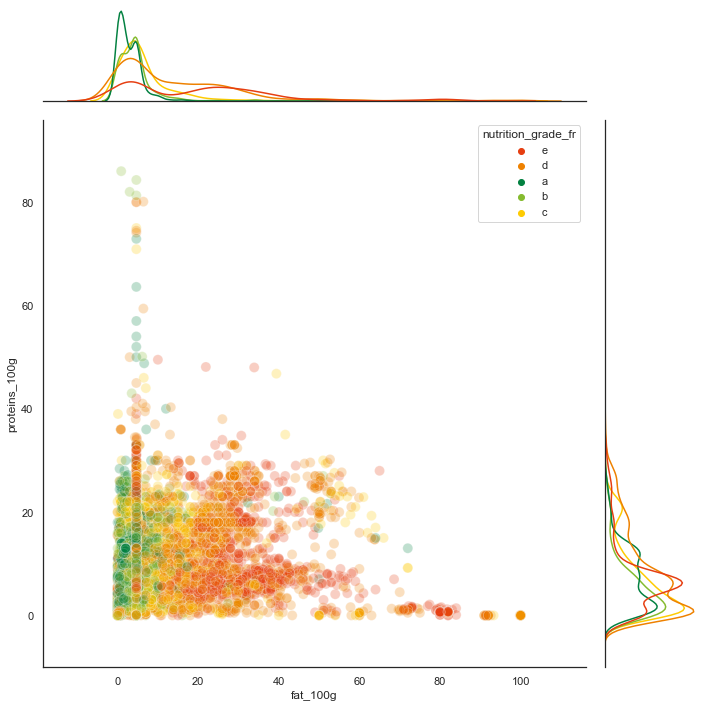

In [30]:
#analyse graisse versus protéines
g=sns.JointGrid(data=food_facts_fr[['nutrition_grade_fr','proteins_100g','fat_100g']].sample(10000),
              y='proteins_100g', x='fat_100g',
              hue='nutrition_grade_fr',  height=10, palette=nutri_palette)
g.plot_joint(sns.scatterplot, s=100, alpha=0.25)
g.plot_marginals(sns.kdeplot)


plt.show()

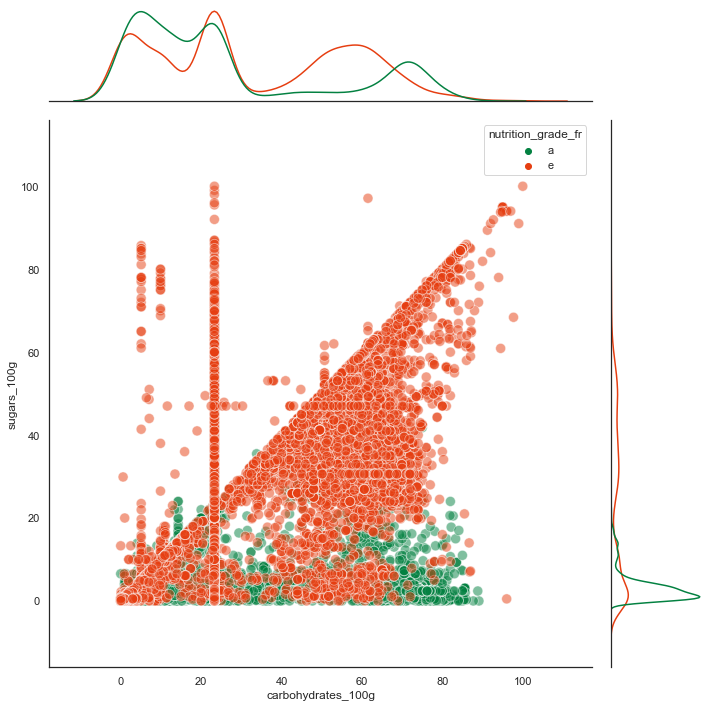

In [31]:
#analyse sugars versus carbohydrates
g=sns.JointGrid(data=pd.concat([nutri_a,nutri_e])[['nutrition_grade_fr','carbohydrates_100g','sugars_100g']],
              x='carbohydrates_100g', y='sugars_100g',
              hue='nutrition_grade_fr',  height=10, palette=nutri_palette)
g.plot_joint(sns.scatterplot, s=100, alpha=0.5)
g.plot_marginals(sns.kdeplot)


plt.show()

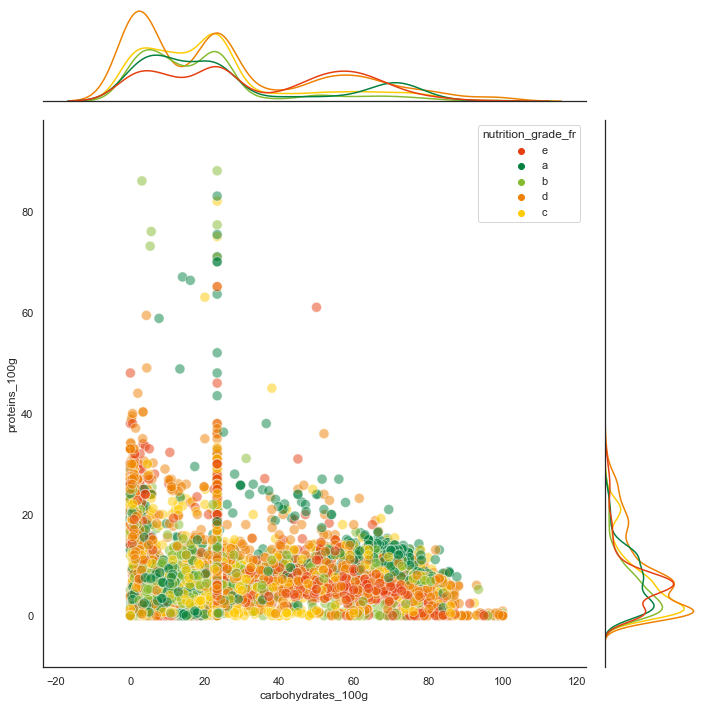

In [32]:
#analyse proteines versus carbohydrates
g=sns.JointGrid(data=food_facts_fr[['nutrition_grade_fr','carbohydrates_100g','proteins_100g']].sample(10000),
              x='carbohydrates_100g', y='proteins_100g',
              hue='nutrition_grade_fr',  height=10, palette=nutri_palette)
g.plot_joint(sns.scatterplot, s=100, alpha=0.5)
g.plot_marginals(sns.kdeplot)

plt.savefig('fig6.png', dpi='figure', metadata=None,
        bbox_inches='tight', pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None )
#plt.show()

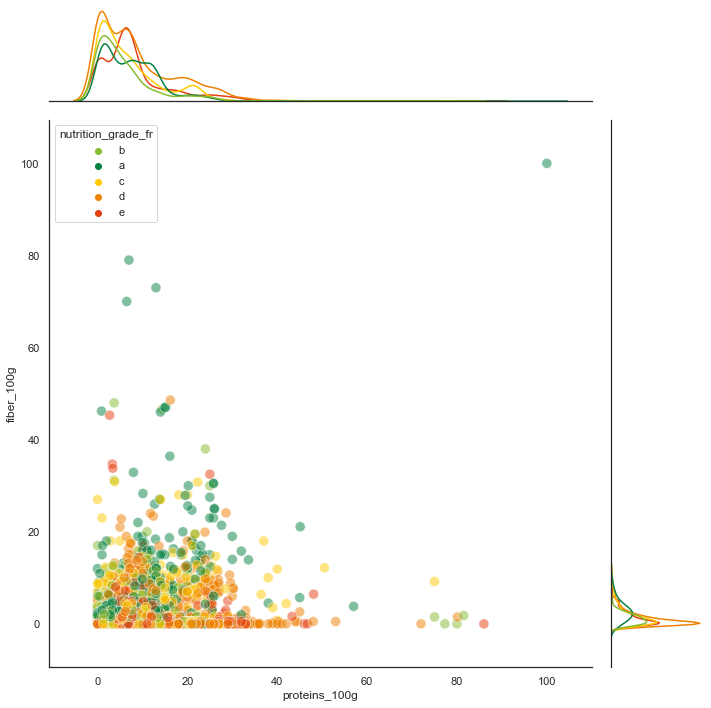

In [33]:
#analyse proteines versus fibres
g=sns.JointGrid(data=food_facts_fr[['nutrition_grade_fr','fiber_100g','proteins_100g']].sample(10000),
              x='proteins_100g', y='fiber_100g',
              hue='nutrition_grade_fr',  height=10, palette=nutri_palette)
g.plot_joint(sns.scatterplot, s=100, alpha=0.5)
g.plot_marginals(sns.kdeplot)

plt.savefig('fig7.png', dpi='figure', metadata=None,
        bbox_inches='tight', pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None )

plt.show()

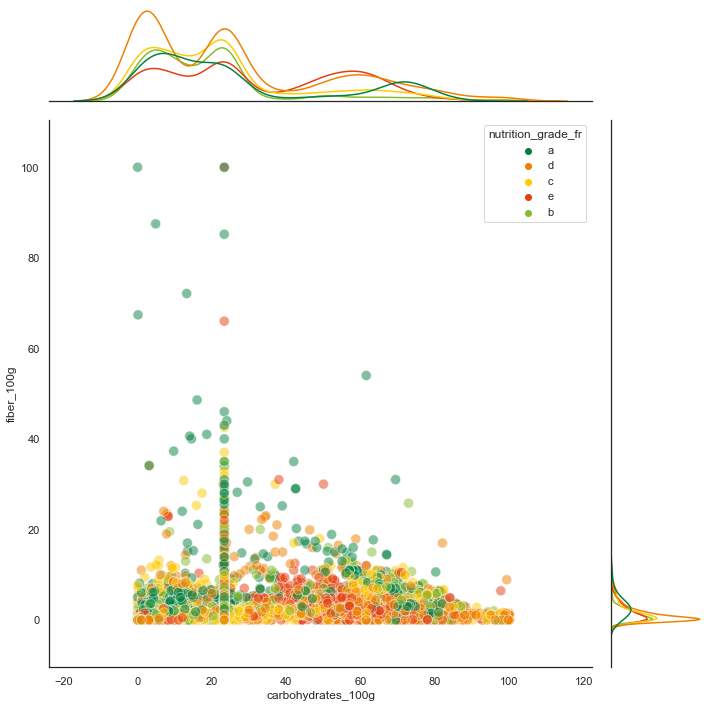

In [34]:
#analyse fibres versus carbohydrates
g=sns.JointGrid(data=food_facts_fr[['nutrition_grade_fr','carbohydrates_100g','fiber_100g']].sample(10000),
              x='carbohydrates_100g', y='fiber_100g',
              hue='nutrition_grade_fr',  height=10, palette=nutri_palette)
g.plot_joint(sns.scatterplot, s=100, alpha=0.5)
g.plot_marginals(sns.kdeplot)


plt.show()

## V Analyse des teneurs en sel des produits <a id="5"></a>

(0.0, 10.0)

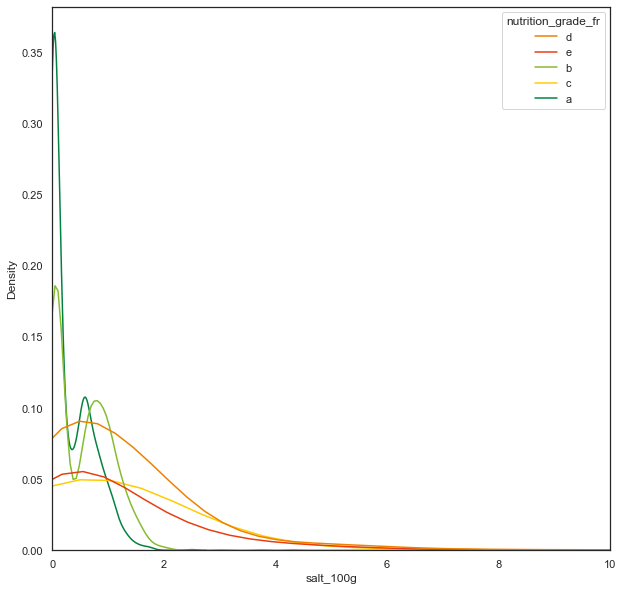

In [35]:
fig1, ax =plt.subplots(figsize=(10,10))
sns.kdeplot(data=food_facts_fr.sample(10000), x='salt_100g', hue='nutrition_grade_fr', ax=ax,
             palette=nutri_palette, fill=False)

ax.set_xlim(0,10)

la teneur en sel des produits d est t-elle normale ?

In [36]:
from statsmodels.stats.diagnostic import kstest_normal

In [37]:
salt=nutri_c['salt_100g']

In [38]:
kstest_normal(salt, dist='norm', pvalmethod='table')

(0.4139909605112975, 0.0009999999999998899)

La p-value est inférieure à 1% on peut rejeter l'hypothèse de normalité. 

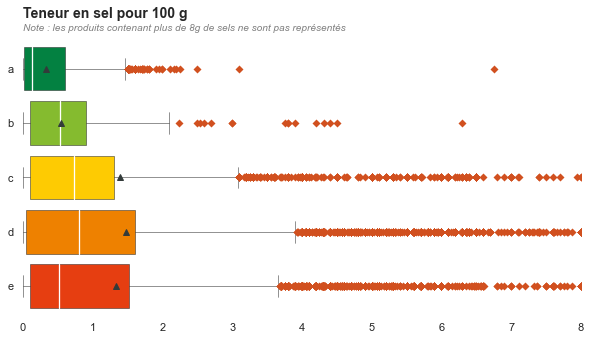

In [39]:
#plot aestethics
flierprops = dict(marker='D', markerfacecolor='#D1501F', markersize=5,markeredgecolor='none')
medianprops = dict(linewidth=1.3, color='w')
meanpointprops = dict( markeredgecolor='#333B3A',
                      markerfacecolor='#333B3A')
#plotting
fig1, ax1 =plt.subplots(figsize=(10,5))
for location in ['left','right', 'bottom', 'top']:
        ax1.spines[location].set_visible(False)
sns.boxplot(y='nutrition_grade_fr', x=food_facts_fr['salt_100g'], ax=ax1,data=food_facts_fr,palette=nutri_palette, saturation=1, linewidth=0.5, 
            showmeans=True, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops)
ax1.set_title("Teneur en sel pour 100 g", loc='left', weight='bold', y=1.05, pad=10, fontsize=14)
ax1.text(s="Note : les produits contenant plus de 8g de sels ne sont pas représentés", x=0,y=-0.75, fontsize=10, fontstyle='italic', color='black',alpha=0.5, va='center', ha='left')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(left=False)
ax1.set_xlim(0,8)       
#plt.show()

plt.savefig('fig4.png', dpi='figure', metadata=None,
        bbox_inches='tight', pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

In [40]:
nutri_a['salt_100g'].quantile(0.99)

1.397

In [41]:
nutri_a['salt_100g'].describe()

count    10956.000000
mean         0.334484
std          0.390776
min          0.000000
25%          0.020000
50%          0.127000
75%          0.609600
max          6.750000
Name: salt_100g, dtype: float64

les produits de nutriscore a sont ils significativement moins salés que les produits du nutriscore e ?

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('salt_100g ~ nutrition_grade_fr',
                data=food_facts_fr).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print (aov_table)
print(mod.summary())

                         df        sum_sq      mean_sq          F  \
nutrition_grade_fr      4.0  1.422216e+04  3555.540247  217.89899   
Residual            66842.0  1.090686e+06    16.317378        NaN   

                           PR(>F)  
nutrition_grade_fr  3.920652e-186  
Residual                      NaN  
                            OLS Regression Results                            
Dep. Variable:              salt_100g   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 22 May 2022   Prob (F-statistic):          3.92e-186
Time:                        07:16:24   Log-Likelihood:            -1.8818e+05
No. Observations:               66847   AIC:                         3.764e+05
Df Residuals:                   66842   BIC:                         3.764e+05
Df Model:                           4               

## VI Comparaison des teneurs en graisse des produits par score <a id="6"></a>

les produits de nutriscore a sont ils significativement moins gras que les produits du nutriscore e 

In [43]:
mod = ols('fat_100g ~ nutrition_grade_fr',
                data=food_facts_fr).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print (aov_table)
print(mod.summary())

                         df        sum_sq        mean_sq            F  PR(>F)
nutrition_grade_fr      4.0  2.561450e+06  640362.403746  3524.012596     0.0
Residual            66842.0  1.214613e+07     181.713994          NaN     NaN
                            OLS Regression Results                            
Dep. Variable:               fat_100g   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     3524.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        07:16:24   Log-Likelihood:            -2.6873e+05
No. Observations:               66847   AIC:                         5.375e+05
Df Residuals:                   66842   BIC:                         5.375e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                  

## VII Comparaison des teneurs en fibres des produits par score <a id="7"></a>

les produits de nutriscore a sont ils significativement moins gras que les produits du nutriscore e 

In [44]:
mod = ols('fiber_100g ~ nutrition_grade_fr',
                data=food_facts_fr).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print (aov_table)
print(mod.summary())

                         df         sum_sq       mean_sq           F  PR(>F)
nutrition_grade_fr      4.0   45213.558173  11303.389543  783.170333     0.0
Residual            66842.0  964721.378779     14.432862         NaN     NaN
                            OLS Regression Results                            
Dep. Variable:             fiber_100g   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     783.2
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        07:16:24   Log-Likelihood:            -1.8407e+05
No. Observations:               66847   AIC:                         3.682e+05
Df Residuals:                   66842   BIC:                         3.682e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                     

## VIII ACP sur les produits laitiers <a id="8"></a>

Nous allons faire un focus sur les produits laitiers qui rentrent dans la composition de beaucoup de menus

In [45]:
pca_cols=[
       'fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g',
       'polyunsaturated_fat_100g', 'omega_3_fat_100g', 'trans_fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

In [46]:
X=food_facts_fr.loc[food_facts_fr['pnns_groups_1']=='milk and dairy products',pca_cols].values

In [47]:
len(X)

5792

In [48]:
from sklearn import decomposition
from sklearn import preprocessing

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=8)
pca.fit(X_scaled)


PCA(n_components=8)

In [49]:
len(X_scaled)

5792

In [50]:
#variance expliquée par les 8 composantes
pca.explained_variance_ratio_.sum()

0.9529400818076452

In [51]:
#dataframe avec les variance expliquées par composants
pca_df=pd.DataFrame(pca.explained_variance_ratio_).sort_values(0,ascending=False).reset_index(drop=True)

In [52]:
#variance cumulée
cum=[]
for i in range(1,9):
    cum.append(pca_df[0:i][0].sum())

In [53]:
pca_df['cum']=cum

In [54]:
pca_df*100

0        cum
0  39.030016  39.030016
1  13.962559  52.992575
2  10.130725  63.123301
3   8.678747  71.802048
4   7.438898  79.240946
5   6.677648  85.918594
6   4.907755  90.826349
7   4.467659  95.294008

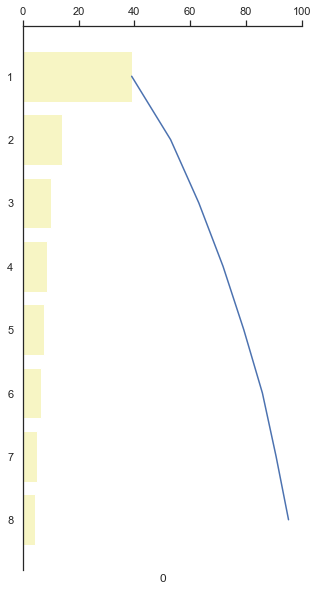

In [55]:
fig1, ax =plt.subplots(figsize=(5,10))
for location in ['right', 'bottom']:
        ax.spines[location].set_visible(False)
sns.barplot(data=pca_df*100, y=pca_df.index+1, x=0, orient='h', color='#FFFDBC')
sns.lineplot(data=pca_df*100, x='cum',y=pca_df.index, markers='D', ax=ax)
ax.xaxis.tick_top()

plt.savefig('fig8.png', dpi='figure', metadata=None,
        bbox_inches='tight', pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

In [56]:
#Analyse des composantes
df_components=pd.DataFrame(pca.components_, columns=pca_cols)

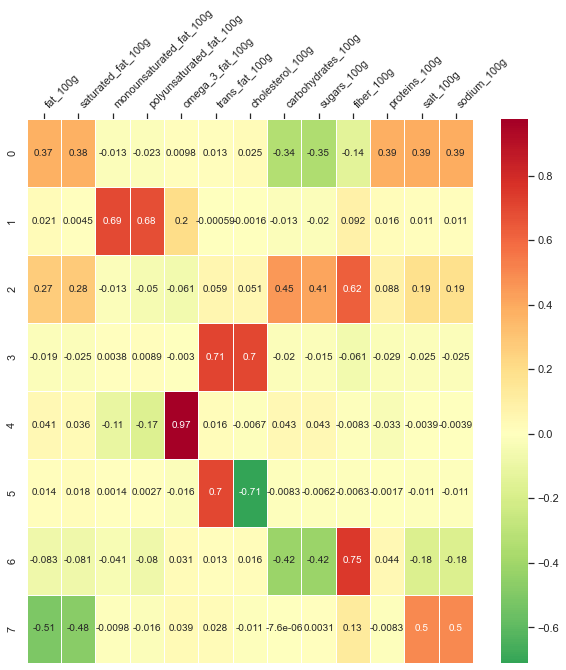

In [57]:
fig1, ax =plt.subplots(figsize=(10,10))
ax=sns.heatmap(df_components, annot=True, linewidths=.5, center=0, cmap='RdYlGn_r', annot_kws={'fontsize':10})
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=45, ha="left")
#plt.show()


plt.savefig('fig9.png', dpi='figure', metadata=None,
        bbox_inches='tight', pad_inches=0,
        facecolor='auto', edgecolor='auto',
        backend=None
       )

Visualisons les produits sur les axes 1 et 3

In [58]:
pca2=pca.fit_transform(X_scaled)
pca_df2=pd.DataFrame(pca2)

In [59]:
pca_df2['nutriscore']=food_facts_fr.loc[food_facts_fr['pnns_groups_1']=='milk and dairy products','nutrition_grade_fr'].values

In [60]:
pca_df2['product']=food_facts_fr.loc[food_facts_fr['pnns_groups_1']=='milk and dairy products','product_name'].values

In [61]:
pca_df2.rename(columns={0:'pca_1', 1:'pca_2', 2:'pca_3', 3:'pca_4'}, inplace=True)

In [62]:
fig = px.scatter(pca_df2.sample(500), x='pca_3', y='pca_1', color='nutriscore',hover_data=['product'], template="simple_white", 
                color_discrete_map=nutri_palette)
fig.show()
